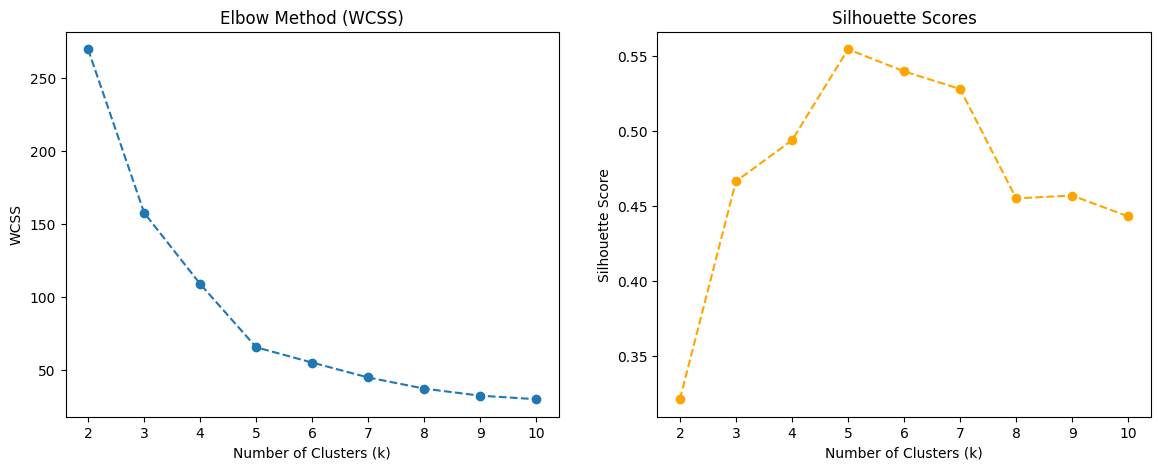

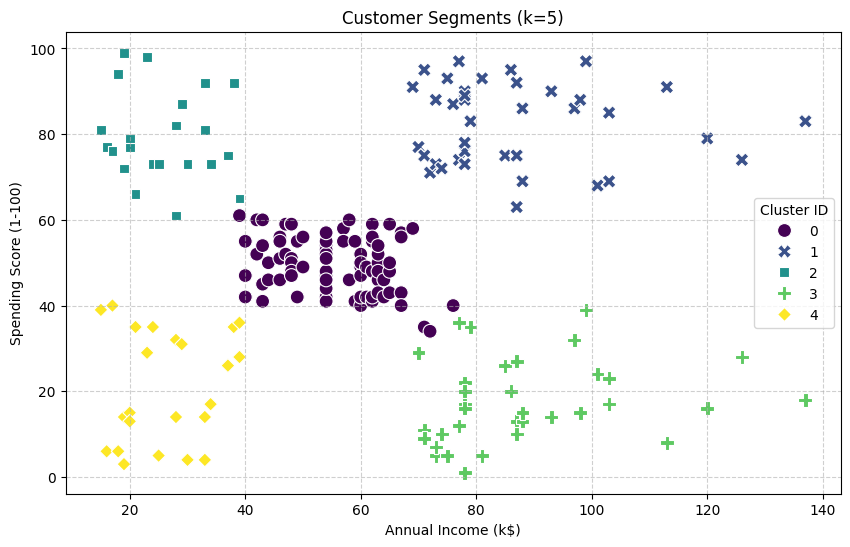

Customer counts per cluster:
Cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# 1. Load the dataset
df = pd.read_csv('Mall_Customers.csv')

# 2. Feature Selection
# We use 'Annual Income' and 'Spending Score' for segmenting customers
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# 3. Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Hyperparameter Tuning (Finding optimal k)
wcss = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    # 'k-means++' ensures better initialization of centroids
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plotting Elbow and Silhouette Score for Tuning
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method (WCSS)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', linestyle='--', color='orange')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

# 5. Training the Final Model
# Based on the plots, k=5 is the optimal number of clusters
best_k = 5
kmeans_final = KMeans(n_clusters=best_k, init='k-means++', random_state=42, n_init=10)
df['Cluster'] = kmeans_final.fit_predict(X_scaled)

# 6. Visualization of Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='viridis',
    s=100,
    style='Cluster'
)
plt.title(f'Customer Segments (k={best_k})')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster ID')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Output segment counts
print("Customer counts per cluster:")
print(df['Cluster'].value_counts())

Best Configuration: Linkage=ward, Clusters=5
Max Silhouette Score: 0.5538


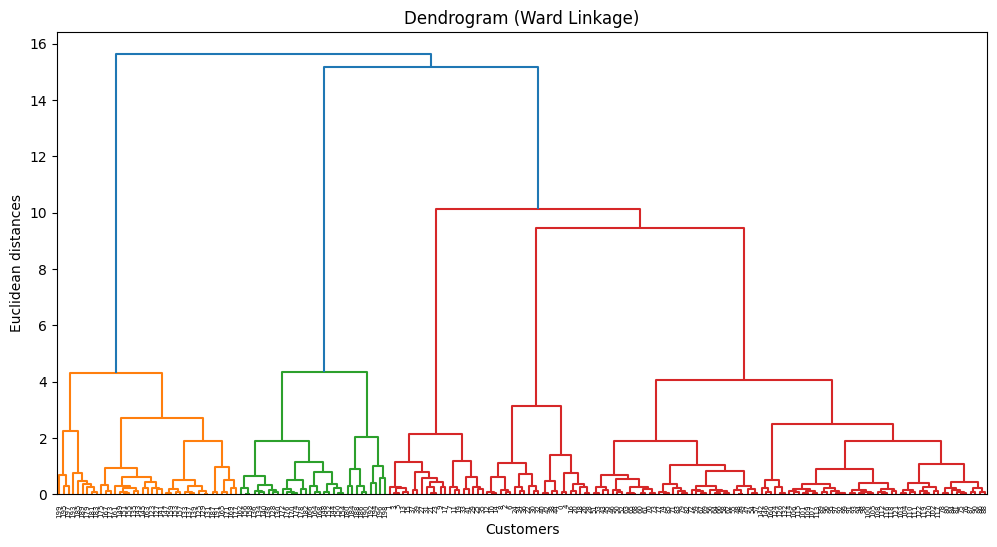

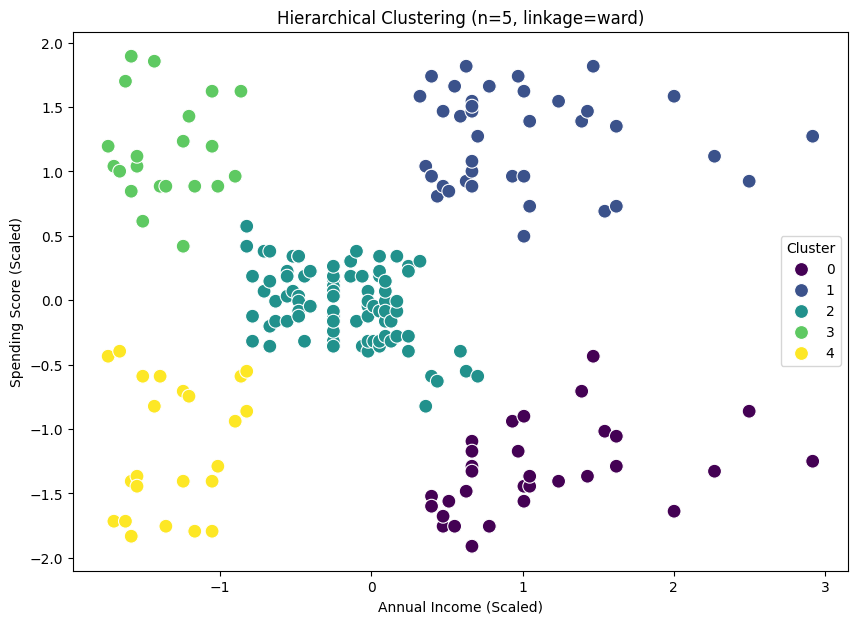

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch

# 1. Load Data
df = pd.read_csv('Mall_Customers.csv')
X = df.iloc[:, [3, 4]].values # Annual Income and Spending Score

# 2. Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Dendrogram to visualize clusters
plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Dendrogram (Ward Linkage)')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.savefig('dendrogram.png')

# 4. Hyperparameter Tuning (Linkage and n_clusters)
linkage_methods = ['ward', 'complete', 'average', 'single']
n_clusters_range = range(2, 11)
results = []

for linkage in linkage_methods:
    for n in n_clusters_range:
        model = AgglomerativeClustering(n_clusters=n, linkage=linkage)
        labels = model.fit_predict(X_scaled)
        score = silhouette_score(X_scaled, labels)
        results.append({'linkage': linkage, 'n_clusters': n, 'silhouette_score': score})

tuning_df = pd.DataFrame(results)
best_config = tuning_df.loc[tuning_df['silhouette_score'].idxmax()]

print(f"Best Configuration: Linkage={best_config['linkage']}, Clusters={best_config['n_clusters']}")
print(f"Max Silhouette Score: {best_config['silhouette_score']:.4f}")

# 5. Final Model with Best Parameters
best_n = int(best_config['n_clusters'])
best_linkage = best_config['linkage']
final_model = AgglomerativeClustering(n_clusters=best_n, linkage=best_linkage)
y_hc = final_model.fit_predict(X_scaled)

# 6. Visualization of Final Clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=y_hc, palette='viridis', s=100)
plt.title(f'Hierarchical Clustering (n={best_n}, linkage={best_linkage})')
plt.xlabel('Annual Income (Scaled)')
plt.ylabel('Spending Score (Scaled)')
plt.legend(title='Cluster')
plt.savefig('clusters_plot.png')